In [1]:
from os.path import exists

data_dir = 'utility/data'

assert exists(f'{data_dir}/insta_data.csv'), 'Loan data file is missing.'

In [27]:
import pandas as pd

data = pd.read_csv(f'{data_dir}/insta_data.csv')
df = data
tt = pd.read_csv(f'{data_dir}/tiktok_data.csv')

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MaxNLocator
import matplotlib.dates as mdates
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from matplotlib.patches import Patch
from wordcloud import WordCloud

The following is data of @washu Tik Tok Analytics from 1/3/24 to 5/30/24:

In [11]:
data.head(10)

,ID,Date,Day of week,Time of day,Reel/Slideshow/Pic,Likes,Comments,Shares,Saves/Bookmarks,Accounts Reached,...,New Followers,Beauty/Aesthetic,Students,Commencement,WashU28,Dorm,Study/Academics/Rsh,Holiday/Special Day,Chancellor,Sports
0,1,6/21,Friday,11:24,Slide,1304,21,69,9,14579,...,0.0,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,6/20,Thursday,8:57,Slide,2425,2,67,15,18196,...,5.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,6/13,Thursday,NaN,Reel,1349,4,130,59,16742,...,2.0,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN
3,4,6/6,Thursday,8:52,Slide,4578,23,374,64,35324,...,13.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,5/31,Friday,9:32,Picture,1904,8,38,7,20546,...,0.0,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN,x
5,6,5/30,Thursday,NaN,Reel,2352,15,331,52,25282,...,6.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,5/27,Monday,8:11,Picture,1423,2,23,5,17745,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,x,NaN,NaN
7,8,5/22,Wednesday,15:07,Slide,3464,9,258,16,23884,...,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,x
8,9,5/21,Tuesday,12:03,Slide,2340,16,49,8,18380,...,0.0,x,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,5/20,Monday,16:33,Slide,1691,24,102,8,14833,...,1.0,NaN,NaN,x,NaN,NaN,NaN,NaN,NaN,NaN


And the following are the list of features the tiktoks will be analyzed based on:

In [12]:
print(data.columns)

Index(['ID', 'Date', 'Day of week', 'Time of day', 'Reel/Slideshow/Pic',
       'Likes', 'Comments', 'Shares', 'Saves/Bookmarks', 'Accounts Reached',
       'Accounts Engaged/Reel Interactions', 'Profile Activity',
       'Non Followers %', 'Impressions/Plays ', 'Reel Replays', 'from Home',
       'from Profile', 'from Explore Pg', 'Hashtags', 'Mentions',
       'Video Duration (s)', 'Profile Vists', 'New Followers',
       'Beauty/Aesthetic', 'Students', 'Commencement', 'WashU28', 'Dorm',
       'Study/Academics/Rsh', 'Holiday/Special Day', 'Chancellor', 'Sports'],
      dtype='object')


The following is a scatterplot of the views WashU Recieved over time:

## I) Analyzing Individual Features over Time (Date)

### 1. WashU Views v.s. Time

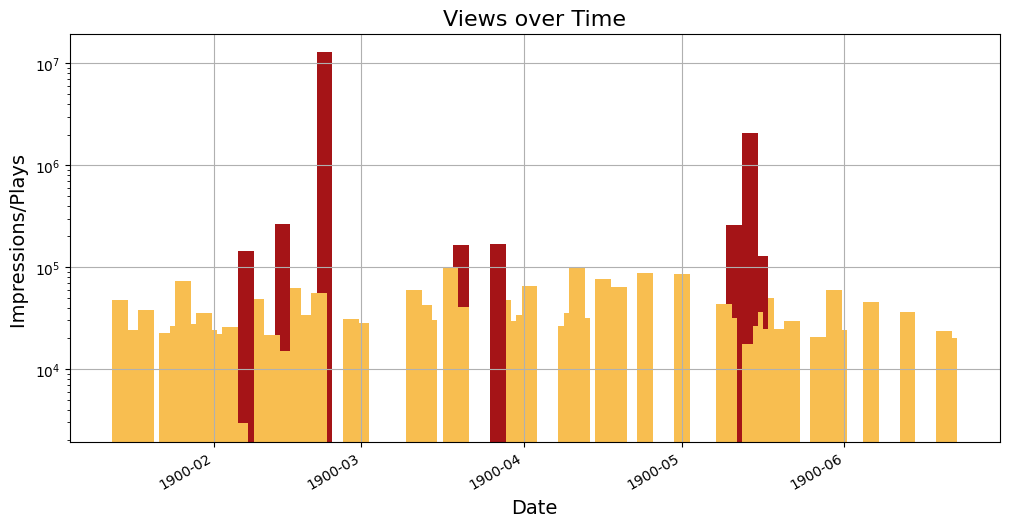

In [18]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d', errors='coerce')
colors = ['#f8be50' if views < 10**5 else '#a51417' for views in df['Impressions/Plays ']]

# bar graph
plt.figure(figsize=(12, 6)) 
plt.bar(df['Date'], df['Impressions/Plays '], width=3, color=colors) 


plt.title('Views over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Impressions/Plays ', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()
# Log scale
plt.yscale('log')

plt.show()

now doing it for just reels and slideshows individually

In [21]:
df_reels = df[df['Reel/Slideshow/Pic'] == 'Reel']
df_slides = df[df['Reel/Slideshow/Pic'] == 'Slide']
df_pic = df[df['Reel/Slideshow/Pic'] == 'Picture']

C:\Users\Lionb\AppData\Local\Temp\ipykernel_28044\1191560682.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_reels['Date'] = pd.to_datetime(df_reels['Date'], format='%m/%d', errors='coerce')
C:\Users\Lionb\AppData\Local\Temp\ipykernel_28044\1191560682.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_slides['Date'] = pd.to_datetime(df_slides['Date'], format='%m/%d', errors='coerce')
C:\Users\Lionb\AppData\Local\Temp\ipykernel_28044\1191560682.py:4: SettingWithCopyWarning: 
A value is trying to b

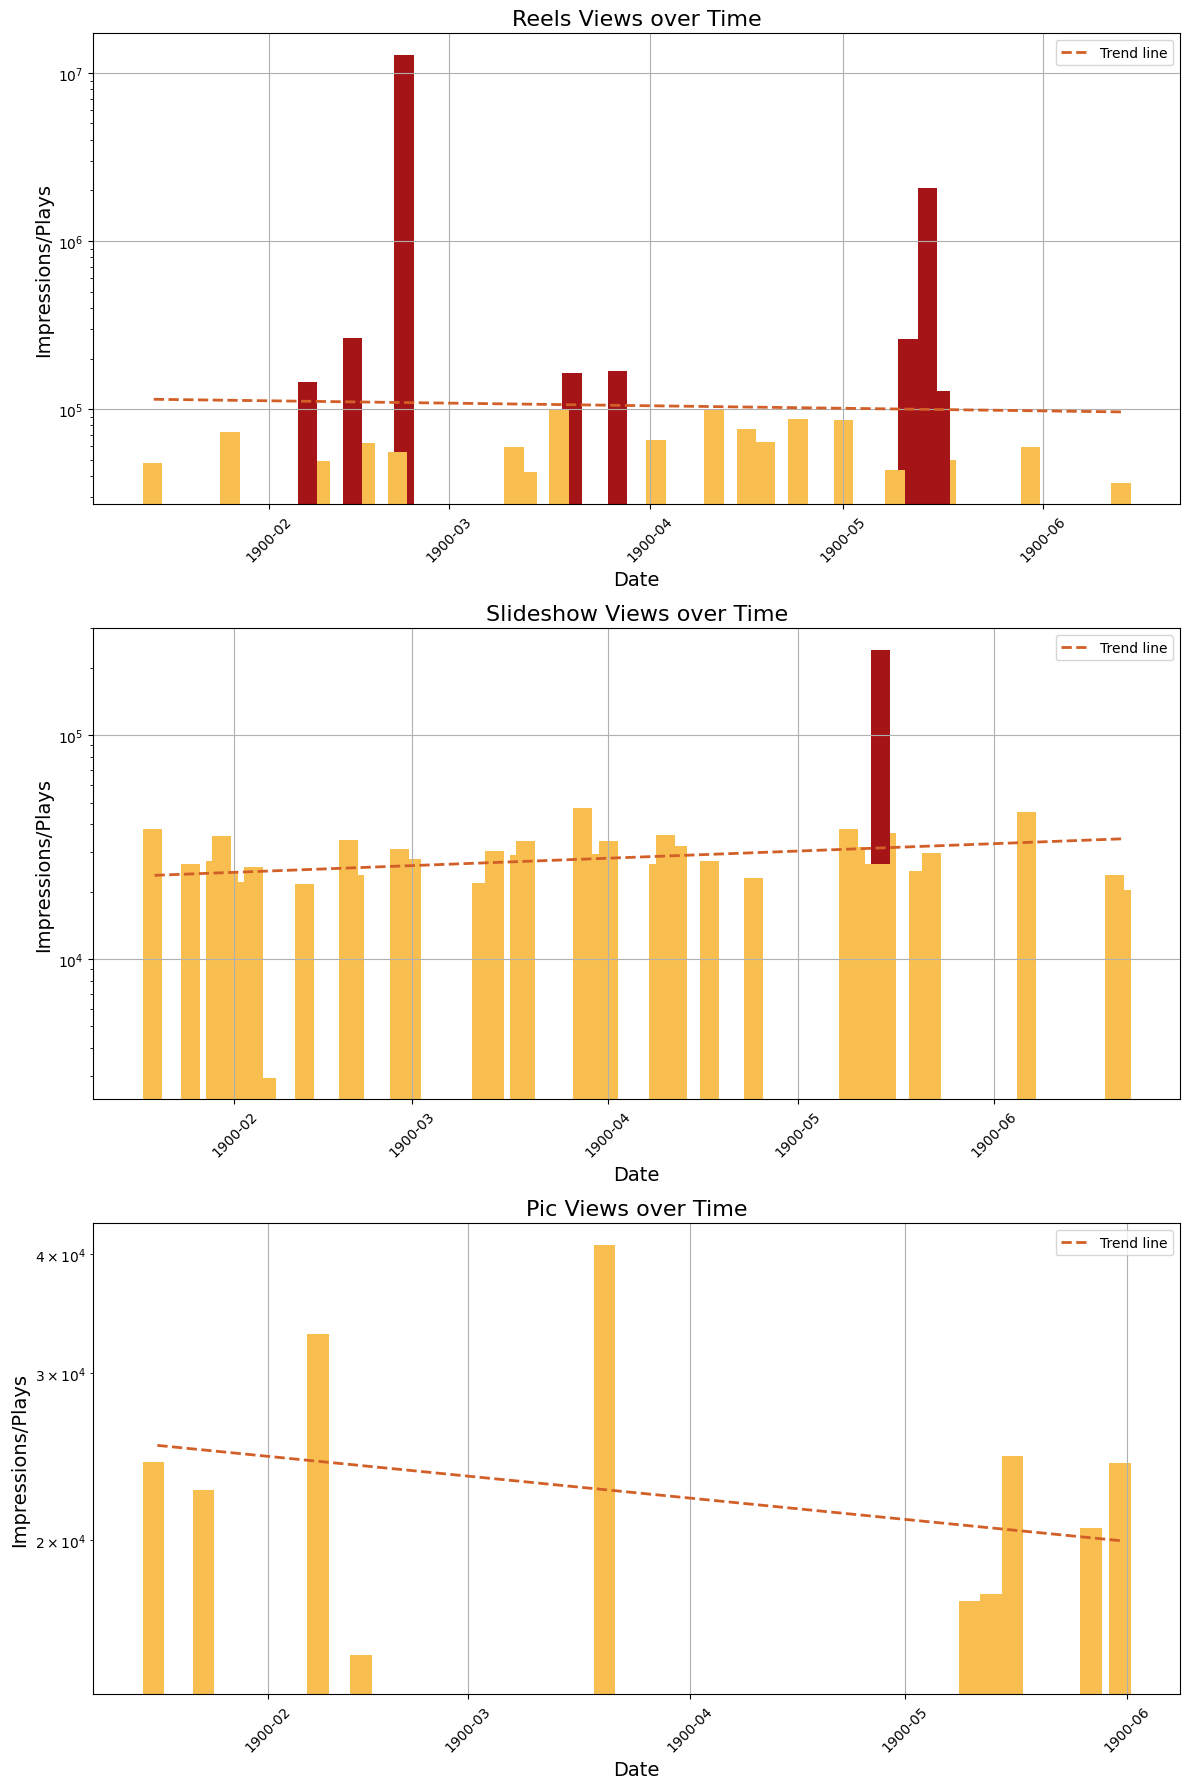

In [24]:
# Convert 'Date' column to datetime format with error handling
df_reels['Date'] = pd.to_datetime(df_reels['Date'], format='%m/%d', errors='coerce')
df_slides['Date'] = pd.to_datetime(df_slides['Date'], format='%m/%d', errors='coerce')
df_pic['Date'] = pd.to_datetime(df_pic['Date'], format='%m/%d', errors='coerce')

df_reels.dropna(subset=['Date'], inplace=True)
df_slides.dropna(subset=['Date'], inplace=True)
df_pic.dropna(subset=['Date'], inplace=True)

# Define a function to create the bar graphs
def create_bar_graph(df, title, ax):
    colors = ['#f8be50' if views < 10**5 else '#a51417' for views in df['Impressions/Plays ']]
    ax.bar(df['Date'], df['Impressions/Plays '], width=3, color=colors)
    
    # Add titles and labels
    ax.set_title(title, fontsize=16)
    ax.set_xlabel('Date', fontsize=14)
    ax.set_ylabel('Impressions/Plays', fontsize=14)
    ax.grid(True)
    
    # Set y-axis to log scale
    ax.set_yscale('log')
    
    # Rotate x-axis labels
    ax.xaxis.set_tick_params(rotation=45)
    
    # Trend line
    dates = df['Date'].map(pd.Timestamp.toordinal)
    z = np.polyfit(dates, np.log(df['Impressions/Plays ']), 1)
    p = np.poly1d(z)
    trend_line = np.exp(p(dates))
    
    ax.plot(df['Date'], trend_line, linestyle='--', color='#d15f27', linewidth=2, label='Trend line')
    ax.legend()



# Create subplots
fig, axes = plt.subplots(3, 1, figsize=(12, 18))

# Create bar graphs for each type
create_bar_graph(df_reels, 'Reels Views over Time', axes[0])
create_bar_graph(df_slides, 'Slideshow Views over Time', axes[1])
create_bar_graph(df_pic, 'Pic Views over Time', axes[2])

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

### 2. WashU {Views + Likes + Comments + Shares + Saves} V.S. Time

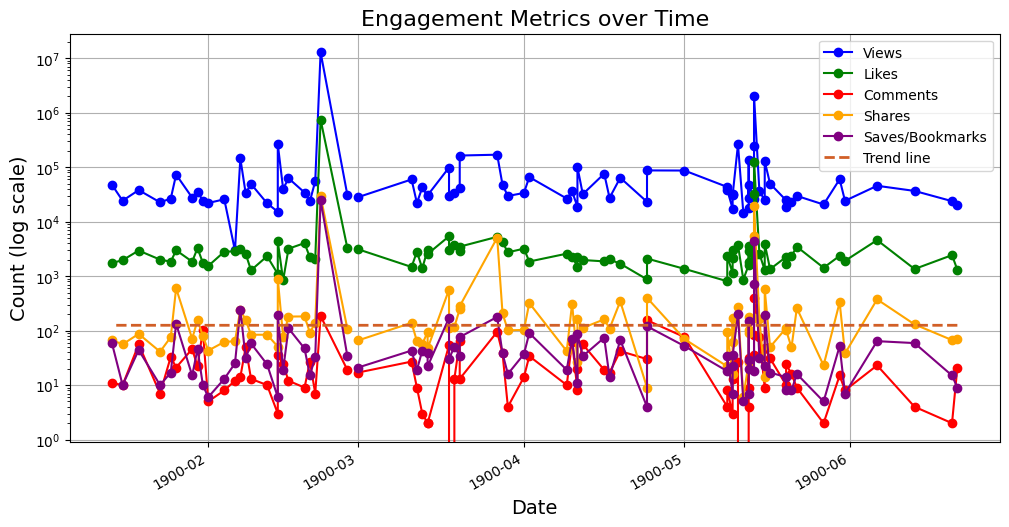

In [34]:
plt.figure(figsize=(12, 6))

# Views' vs 'Date'
plt.plot(df['Date'], df['Impressions/Plays '], marker='o', linestyle='-', color='blue', label='Views')

# 'Likes' vs 'Date'
plt.plot(df['Date'], df['Likes'], marker='o', linestyle='-', color='green', label='Likes')

# 'Comments' vs 'Date'
plt.plot(df['Date'], df['Comments'], marker='o', linestyle='-', color='red', label='Comments')

#'Shares' vs 'Date'
plt.plot(df['Date'], df['Shares'], marker='o', linestyle='-', color='orange', label='Shares')

# 'Saves/Bookmarks' vs 'Date'
plt.plot(df['Date'], df['Saves/Bookmarks'], marker='o', linestyle='-', color='purple', label='Saves/Bookmarks')

plt.title('Engagement Metrics over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Count (log scale)', fontsize=14)
plt.grid(True)
plt.yscale('log')  # Log scale 
plt.legend()
plt.gcf().autofmt_xdate()



plt.show()

lets focus on shares!

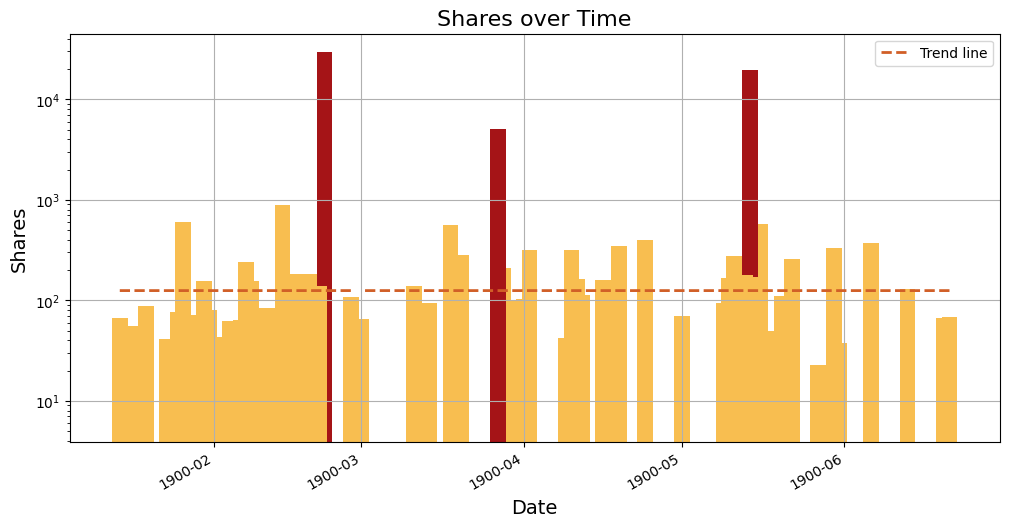

In [36]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%m/%d', errors='coerce')
colors = ['#f8be50' if shares < 10**3 else '#a51417' for shares in df['Shares']]

# bar graph
plt.figure(figsize=(12, 6)) 
plt.bar(df['Date'], df['Shares'], width=3, color=colors) 


plt.title('Shares over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Shares', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()
# Log scale
plt.yscale('log')

dates = df['Date'].map(pd.Timestamp.toordinal)
z = np.polyfit(dates, np.log(df['Shares']), 1)
p = np.poly1d(z)
trend_line = np.exp(p(dates))
    
plt.plot(df['Date'], trend_line, linestyle='--', color='#d15f27', linewidth=2, label='Trend line')
plt.legend()

plt.show()

Like to View Ratio

The ID of the highest like percentage is: 71


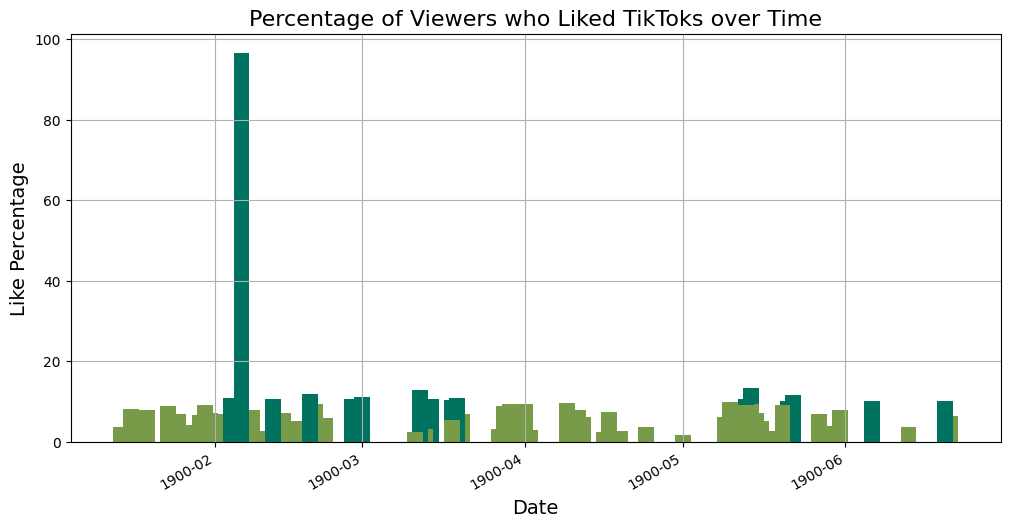

In [39]:
# Calculate Like_Percent
df['Like_Percent'] = df['Likes'] / df['Impressions/Plays '] * 100

max_like_percent_index = df['Like_Percent'].idxmax()
max_like_percent_id = df.loc[max_like_percent_index, 'ID']

print(f'The ID of the highest like percentage is: {max_like_percent_id}')

colors = ['#007360' if like_percent > 10 else '#789b4a' for like_percent in df['Like_Percent']]

# 'Like_Percent' vs 'Date'
plt.figure(figsize=(12, 6))  # Set the figure size
plt.bar(df['Date'], df['Like_Percent'], width=3, color=colors)

plt.title('Percentage of Viewers who Liked TikToks over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Like Percentage', fontsize=14)
plt.grid(True)
plt.gcf().autofmt_xdate()

plt.show()